In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

df = pd.read_csv('assets/city_temperature.csv', low_memory= False)
print( df.info() )
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None
                Region Country  State           City  Month  Day  Year  \
1817827  North America      US  Idaho          Boise      7   13  2007   
812158          Europe   Italy    NaN           Rome      1    6  2018   
1215733  North America  Mexico    NaN    Mexico City      9    4  2002   
2416534  North America      US   Ohio         Dayton      5   24  2007   
2758368  North America      US  Texas  Wichita Falls      5    9  2014   

         AvgTemperature  
1817827            90.4  
812158             57.0  
121573

In [3]:
# 清洗不正确数据
df = df[df['Day'] != 0]  # 删除 Day 列值为 0 的行，有几行数据为0，应该是输入错误
df = df.query('Year >= 1995') # 去除Year值不正确的行，去除Year值<=1995的行
df = df.query("AvgTemperature != -99") # 去除AvgTemperature的值不正确的行
df = df.drop('State', axis= 1) # 由于state列中大部分数据都是缺失值，分析时也不需要该列，因此删除该列。
print( df.info() )
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 2826655 entries, 0 to 2906326
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   City            object 
 3   Month           int64  
 4   Day             int64  
 5   Year            int64  
 6   AvgTemperature  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 172.5+ MB
None
                Region Country         City  Month  Day  Year  AvgTemperature
1182297  North America  Canada       Regina      4   14  2018            25.8
1927290  North America      US     Goodland     10   30  2002            24.2
347177            Asia   India        Delhi     10    9  2013            86.2
2164189  North America      US     Billings      5   24  2001            64.9
2738389  North America      US  San Antonio      5   21  2010            79.6


In [4]:
### 问题1：原数据集中平均温度列AvgTemperature采用华氏温度，请转换为摄氏温度

# 华氏温度（Fahrenheit）和摄氏温度（Celsius）之间的转换公式如下：
# 
# $$ C = (F - 32) \times \frac{5}{9} $$
# 
# 其中，
# - $ C $ 表示摄氏温度；
# - $ F $ 表示华氏温度。
# 
# **要求：采用lambda函数映射**
df['AvgTemperature'] = df['AvgTemperature'].map(lambda x: (x - 32) * 5 / 9)

df

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.888889
1,Africa,Algeria,Algiers,1,2,1995,9.666667
2,Africa,Algeria,Algiers,1,3,1995,9.333333
3,Africa,Algeria,Algiers,1,4,1995,8.000000
4,Africa,Algeria,Algiers,1,5,1995,8.833333
...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.000000
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.555556
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.000000
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.777778


In [5]:
### 问题2：将原来的“Month”、“ Day”、“ Year”三列合并成生成新列Date，格式为“2024-04-20”式样

df['Date'] = df.apply(lambda row: f"{row['Year']}-{row['Month']}-{row['Day']}", axis=1)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Algiers,1,1,1995,17.888889,1995-1-1
1,Africa,Algeria,Algiers,1,2,1995,9.666667,1995-1-2
2,Africa,Algeria,Algiers,1,3,1995,9.333333,1995-1-3
3,Africa,Algeria,Algiers,1,4,1995,8.000000,1995-1-4
4,Africa,Algeria,Algiers,1,5,1995,8.833333,1995-1-5


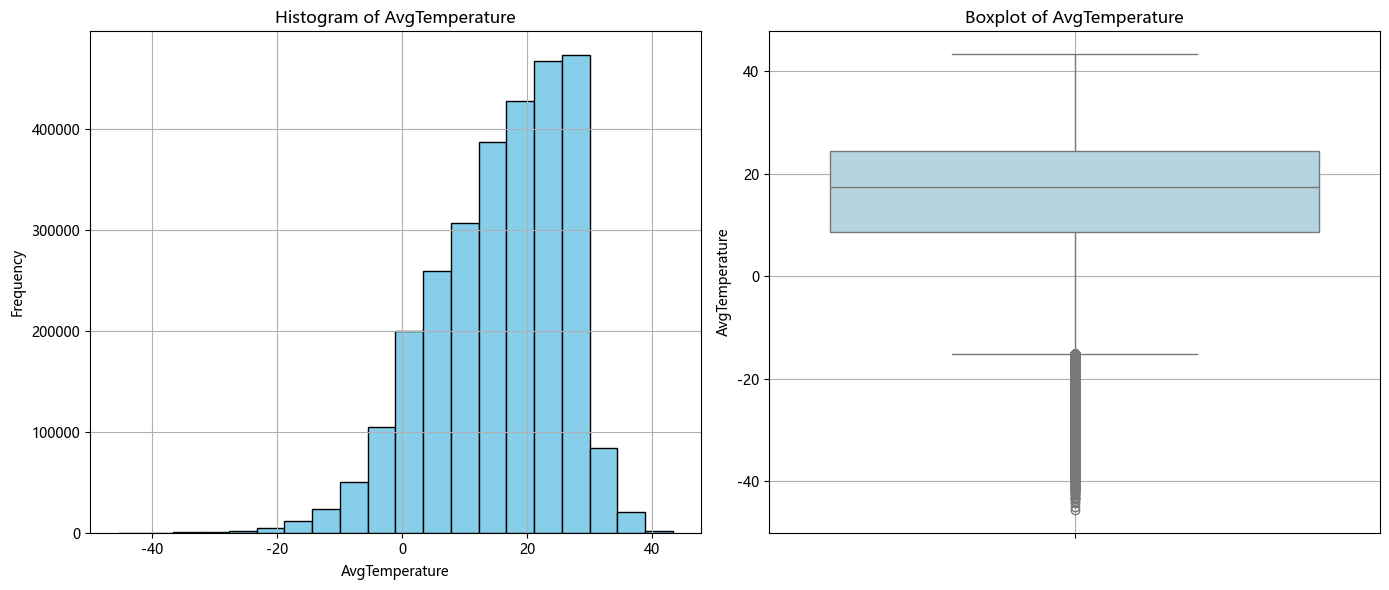

In [7]:
import matplotlib.pyplot as plt

# 创建包含左右两个子图的图像
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 绘制直方图
axes[0].hist(df['AvgTemperature'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of AvgTemperature')
axes[0].set_xlabel('AvgTemperature')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# 使用 Seaborn 绘制箱线图
import seaborn as sns
sns.boxplot(y='AvgTemperature', data=df, ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot of AvgTemperature')
axes[1].set_ylabel('AvgTemperature')
axes[1].grid(True)

# 显示图形
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# 将 Date 列转换为 datetime 格式
df['Date'] = pd.to_datetime(df['Date'])

# 定义一个函数来确定季节
def get_quarter(date):
    quarter_dict = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                    4: 'Q2', 5: 'Q2', 6: 'Q2',
                    7: 'Q3', 8: 'Q3', 9: 'Q3',
                    10: 'Q4', 11: 'Q4', 12: 'Q4'}
    quarter = quarter_dict[(date.month)]
    return f"{date.year}{quarter}"

# 将 Quarter 列添加到数据集中
df['Quarter'] = df['Date'].apply(get_quarter)

# 显示包含 Quarter 列的数据集
df


,Region,Country,City,Month,Day,Year,AvgTemperature,Date,Quarter
0,Africa,Algeria,Algiers,1,1,1995,17.888889,1995-01-01,1995Q1
1,Africa,Algeria,Algiers,1,2,1995,9.666667,1995-01-02,1995Q1
2,Africa,Algeria,Algiers,1,3,1995,9.333333,1995-01-03,1995Q1
3,Africa,Algeria,Algiers,1,4,1995,8.000000,1995-01-04,1995Q1
4,Africa,Algeria,Algiers,1,5,1995,8.833333,1995-01-05,1995Q1
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.000000,2013-07-27,2013Q3
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.555556,2013-07-28,2013Q3
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.000000,2013-07-29,2013Q3
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.777778,2013-07-30,2013Q3


In [16]:
# 假设 df 是你的数据集，其中包含了 Quarter 列和 AvgTemperature 列

import pandas as pd

# 计算每个季节的平均温度和标准差
seasonal_avg_temp = df.groupby('Quarter')['AvgTemperature'].agg(['mean', 'std']).reset_index()

# 计算整体平均温度和标准差
overall_avg_temp = df['AvgTemperature'].mean()
overall_std_temp = df['AvgTemperature'].std()

# 计算每个季节的 Z 分数
seasonal_avg_temp['Z_Score'] = (seasonal_avg_temp['mean'] - overall_avg_temp) / overall_std_temp

# 找出 Z 分数大于 0.75 或小于 -0.75 的季节，即离群季节
outlier_seasons = seasonal_avg_temp[(seasonal_avg_temp['Z_Score'] > 0.75) | (seasonal_avg_temp['Z_Score'] < -0.75)]

# 显示结果
print("离群季节的平均温度及 Z 分数：")
print(outlier_seasons)


离群季节的平均温度及 Z 分数：
   Quarter       mean        std   Z_Score
4   1996Q1   7.407723  12.274118 -0.787539
86  2016Q3  23.746852   5.702927  0.752480


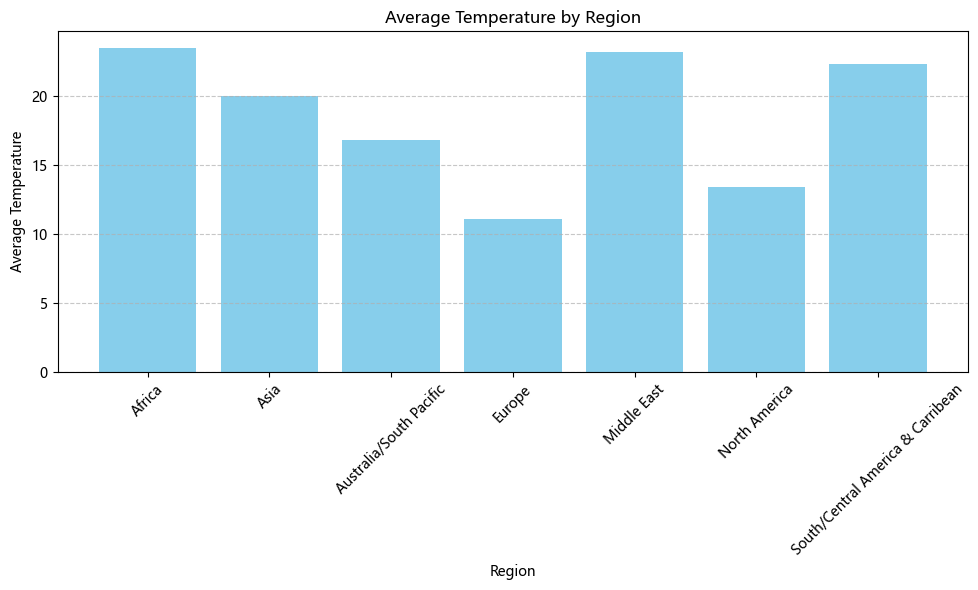

In [17]:
### 问题6：按洲Region分组计算平均温度并绘制柱状图

import pandas as pd
import matplotlib.pyplot as plt

# 按照洲（Region）分组计算平均温度
avg_temp_by_region = df.groupby('Region')['AvgTemperature'].mean().reset_index()

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(avg_temp_by_region['Region'], avg_temp_by_region['AvgTemperature'], color='skyblue')
plt.title('Average Temperature by Region')
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

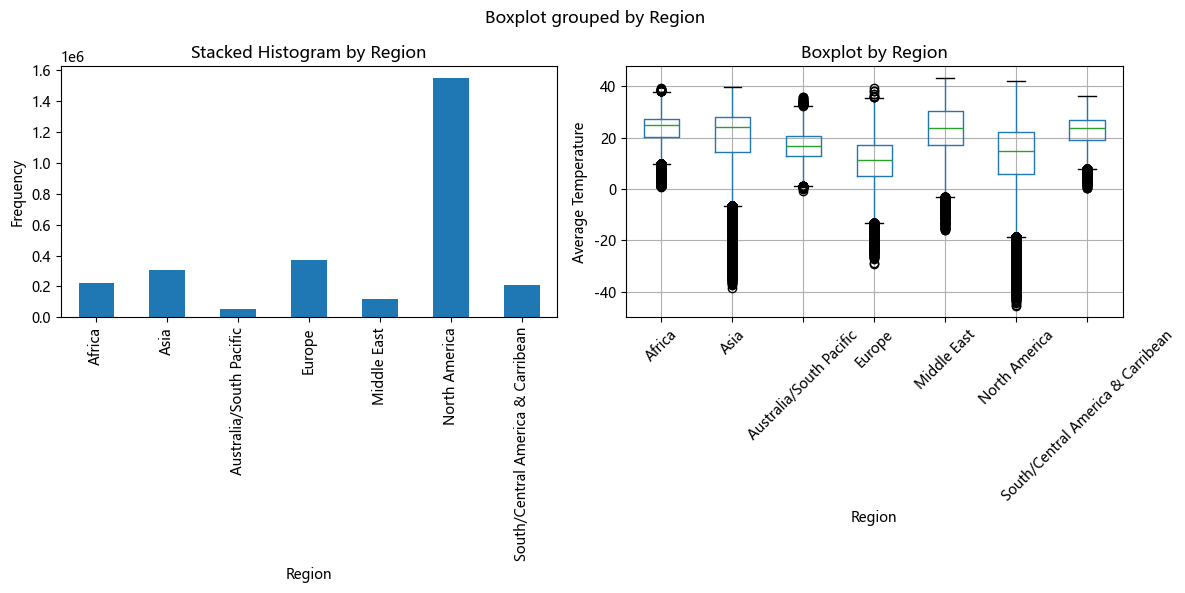

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建堆叠直方图和箱线图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 堆叠直方图：按照每个地区的样本数量进行绘制
(df.groupby('Region').size()
 .reset_index(name='Count')  # 将计数列重命名为 'Count'
 .plot(kind='bar', x='Region', y='Count', stacked=True, legend=False, ax=axes[0]))
axes[0].set_title('Stacked Histogram by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Frequency')

# 箱线图
boxplot_dict = df.boxplot(column='AvgTemperature', by='Region', ax=axes[1])
axes[1].set_title('Boxplot by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Temperature')

# 旋转箱线图的 x 轴刻度标签
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [33]:
df.groupby('Region').agg({
    "Region":"count"
}).reset_index

<bound method DataFrame.reset_index of                                     Region
Region                                    
Africa                              220919
Asia                                306163
Australia/South Pacific              55209
Europe                              368702
Middle East                         120811
North America                      1548160
South/Central America & Carribean   206691>

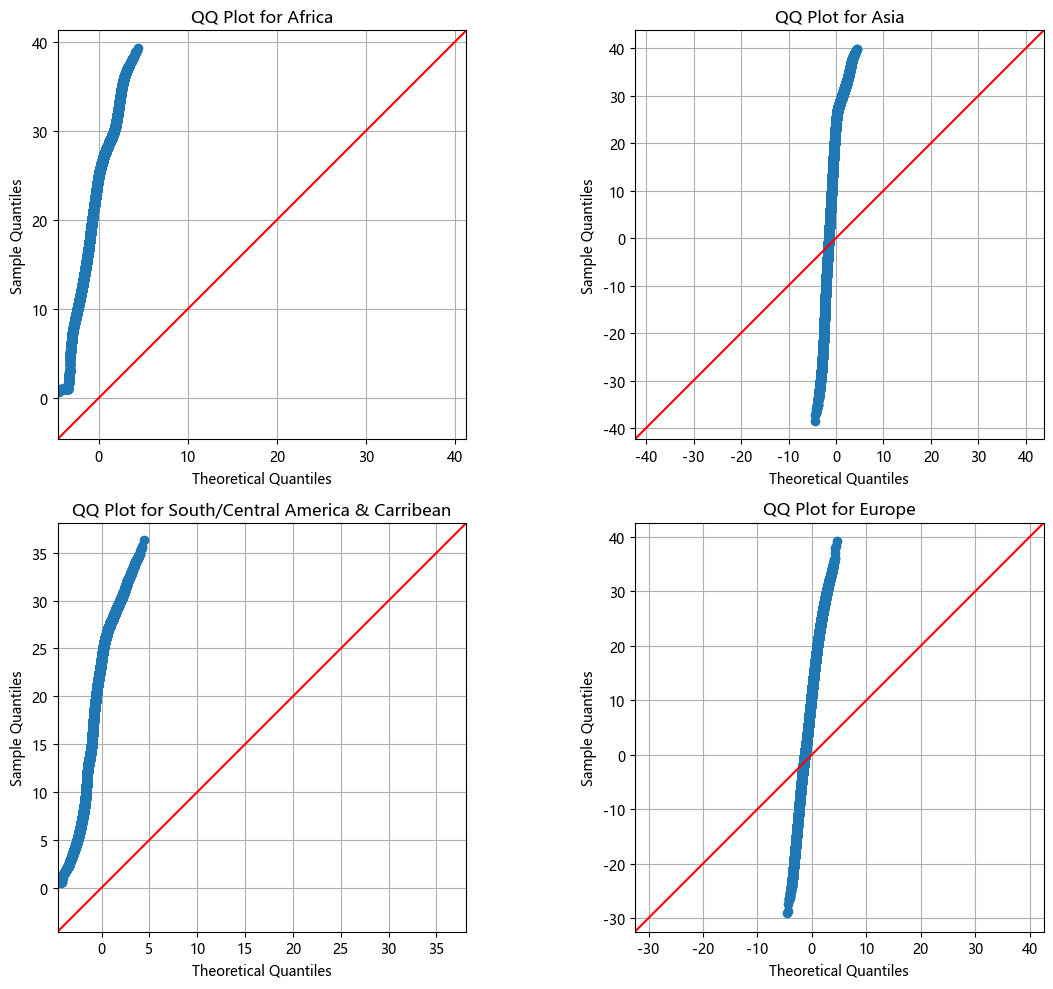

In [39]:
# ### 问题8：采用statsmodels，按洲Region绘制QQ图
# 
# **分析Africa、Asia、South/Central America & Carribean、Europe四个主要洲。**
# 
# 在统计学中，QQ图（Quantile-Quantile Plot）是一种用来比较一组数据的分布与理论分布（通常是正态分布或其他已知分布）之间相似度的图形工具。具体来说：
# - 当数据点在QQ图上大致均匀地分布在45度斜率的直线上时，这强烈表明原始数据的分布与所参照的理论分布（例如正态分布）非常接近，即数据可能是正态分布的。
# - 如果数据点明显偏离45度线，尤其是在图形的特定部分出现弯曲、聚集或分散，这意味着数据的分布特征与正态分布不同。例如，若数据点在图形下半部分较为密集而在上半部分较为稀疏，可能意味着数据存在负偏斜；反之则可能表明数据存在正偏斜。
# - 数据点的极端偏离，可能指示存在离群值，也就是那些远离大部分数据点的观测值。
# - 若数据点呈现其他特定的模式（如U形、S形等），则可能揭示出数据的分布具有非正态性特征，如厚尾分布、多重峰分布或其他类型的偏态分布。
# 
# 提示：
# - sm.qqplot函数

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 选择四个主要洲的数据
selected_regions = ['Africa', 'Asia', 'South/Central America & Carribean', 'Europe']
selected_data = df[df['Region'].isin(selected_regions)]

# 按照洲绘制QQ图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for region, ax in zip(selected_regions, axes.flatten()):
    data = selected_data[selected_data['Region'] == region]['AvgTemperature']
    sm.qqplot(data, line='45', ax=ax)
    ax.set_title(f'QQ Plot for {region}')
    ax.set_aspect('equal')  # 设置纵横比为1，保持图形呈45度角
    ax.grid(True)

plt.tight_layout()
plt.show()


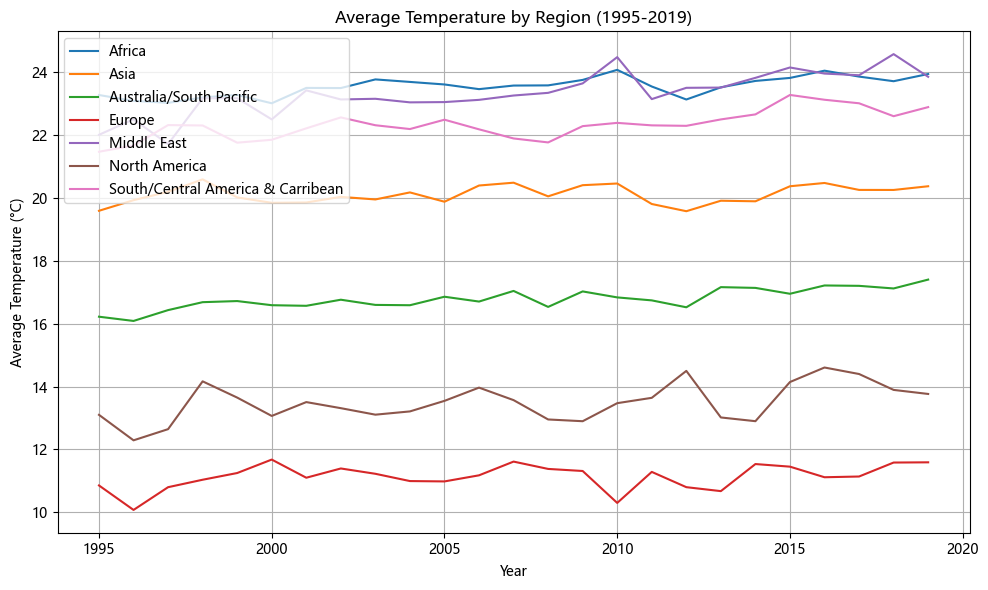

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择1995年至2019年的数据
selected_data = df[(df['Year'] >= 1995) & (df['Year'] <= 2019)]

# 按照洲Region绘制平均温度曲线
fig, ax = plt.subplots(figsize=(10, 6))

# 循环遍历每个洲Region
for region in df['Region'].unique():
    region_data = selected_data[selected_data['Region'] == region]
    avg_temp = region_data.groupby('Year')['AvgTemperature'].mean()
    ax.plot(avg_temp.index, avg_temp.values, label=region)

# 添加图例、标题和标签
ax.legend(loc='upper left')  # 将图例放置在左上角
ax.set_title('Average Temperature by Region (1995-2019)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (°C)')

plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

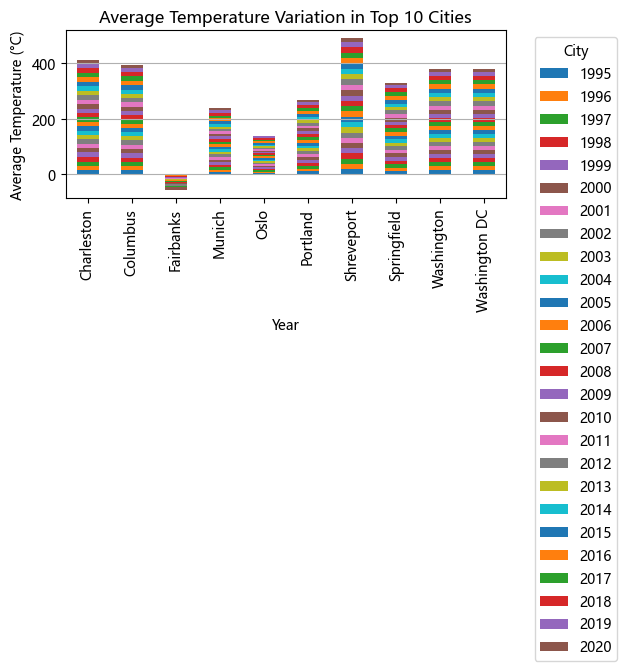

In [42]:
### 问题10：找出数据集中记录最多的前10个城市（City），绘制这10个城市的平均温度变化的堆叠直方图

import pandas as pd
import matplotlib.pyplot as plt

# 统计每个城市的记录数量
city_counts = df['City'].value_counts()

# 选择记录数量最多的前10个城市
top_10_cities = city_counts.head(10).index

# 选取前10个城市的数据
top_10_city_data = df[df['City'].isin(top_10_cities)]

# 计算每个城市的平均温度
city_avg_temperatures = top_10_city_data.groupby(['City', 'Year'])['AvgTemperature'].mean().unstack()

# 绘制堆叠直方图
plt.figure(figsize=(10, 6))
city_avg_temperatures.plot(kind='bar', stacked=True)
plt.title('Average Temperature Variation in Top 10 Cities')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


17:11:53 - cmdstanpy - INFO - Chain [1] start processing
17:11:56 - cmdstanpy - INFO - Chain [1] done processing
D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


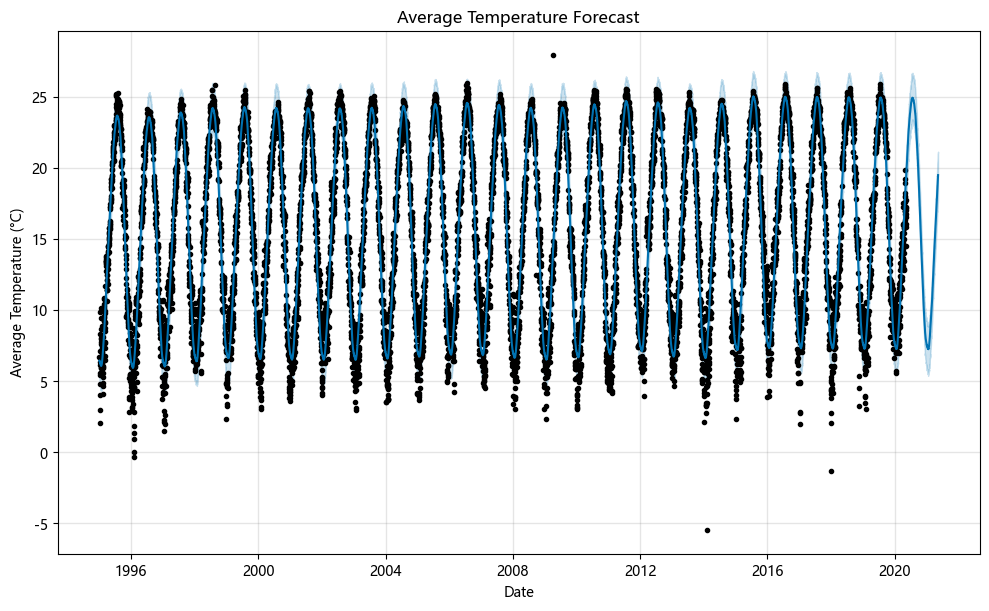

D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
D:\Programing\Control\Anaconda\envs\mining\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

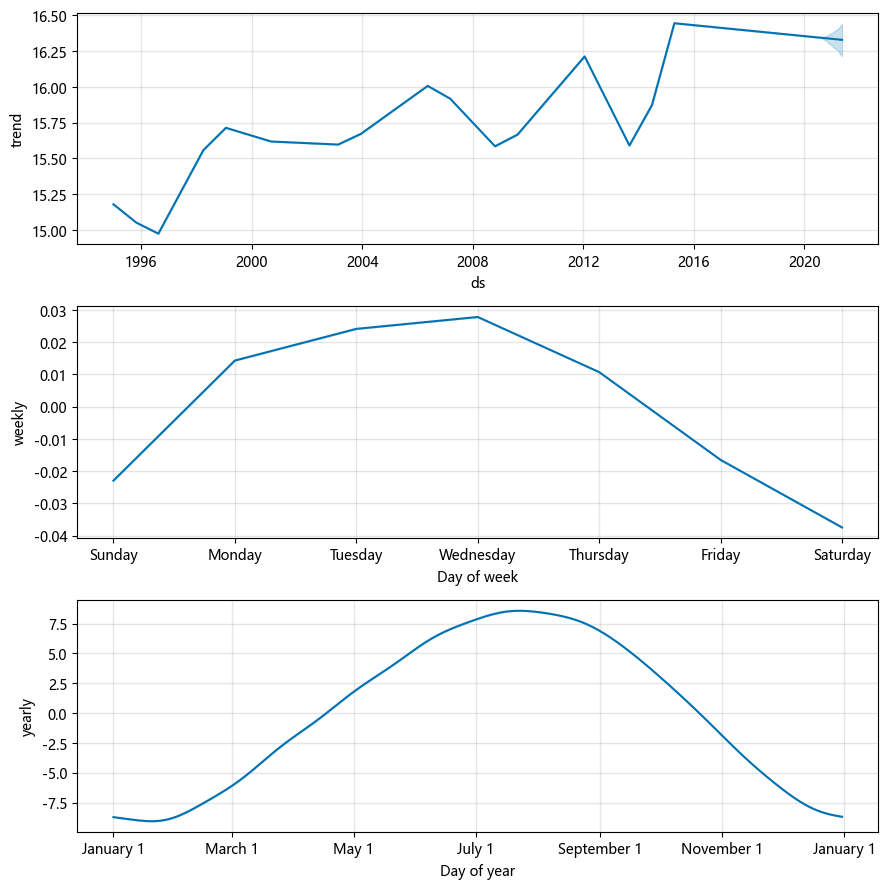

In [45]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. 准备数据并按日期聚合
data = df.groupby('Date')['AvgTemperature'].mean().reset_index()
data.columns = ['ds', 'y']

# 2. 创建并拟合Prophet模型
model = Prophet()
model.fit(data)

# 3. 生成未来日期并预测温度
future = model.make_future_dataframe(periods=365)  # 预测未来365天
forecast = model.predict(future)

# 4. 可视化结果
fig = model.plot(forecast)
plt.title('Average Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.show()

# 5. 可视化趋势成分
fig = model.plot_components(forecast)
plt.show()
